In [1]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
import pandas as pd
import numpy as np

import re
import string

import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\naikv\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [8]:
npr = pd.read_csv('nlp2.csv')
npr.head()

,Article
0,Fossil fuels and climate change: the facts\n\n...
1,"The use of fossil fuels—coal, oil, and natural..."
2,"For more than a century, burning fossil fuels ..."
3,"Crude oil, natural gas, and coal are organic m..."
4,What are Fossil Fuels?\nThe substances which a...


In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naikv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
npr.shape

(50, 1)

In [14]:
stops = stopwords.words("english")             

npr['Article'] = npr.Article.str.replace("[^\w\s]", "").str.lower() # Lowercase
npr['Article']= npr['Article'].apply(lambda x: 
                              ' '.join([item for item in str(x).split() if item not in stops])) # Remove english stopwords
npr['Article'] = npr.Article.str.replace("[^\w\s]", "") # Remove punctuation
npr['Article'] = npr['Article'].str.replace('\d+', '') # Remove digits

<>:3: DeprecationWarning: invalid escape sequence \w
<>:6: DeprecationWarning: invalid escape sequence \w
<>:7: DeprecationWarning: invalid escape sequence \d
<>:3: DeprecationWarning: invalid escape sequence \w
<>:6: DeprecationWarning: invalid escape sequence \w
<>:7: DeprecationWarning: invalid escape sequence \d
C:\Users\naikv\AppData\Local\Temp/ipykernel_14468/2923787469.py:3: DeprecationWarning: invalid escape sequence \w
  npr['Article'] = npr.Article.str.replace("[^\w\s]", "").str.lower() # Lowercase
C:\Users\naikv\AppData\Local\Temp/ipykernel_14468/2923787469.py:6: DeprecationWarning: invalid escape sequence \w
  npr['Article'] = npr.Article.str.replace("[^\w\s]", "") # Remove punctuation
C:\Users\naikv\AppData\Local\Temp/ipykernel_14468/2923787469.py:7: DeprecationWarning: invalid escape sequence \d
  npr['Article'] = npr['Article'].str.replace('\d+', '') # Remove digits
C:\Users\naikv\AppData\Local\Temp/ipykernel_14468/2923787469.py:3: FutureWarning: The default value of reg

In [15]:
npr['Article']

0     fossil fuels climate change facts link fossil ...
1     use fossil fuelscoal oil natural gasresults si...
2     century burning fossil fuels generated energy ...
3     crude oil natural gas coal organic materials h...
4     fossil fuels substances act energy sources kno...
5     fossil fuel corporations profiting continued c...
6     burning fossil fuels refers burning oil natura...
7     cars trucks release nitrogen atmosphere contri...
8     oil energy source time refine crude extracted ...
9     producing burning fossil fuels creates air pol...
10    burning fossil fuels significant hidden costs ...
11    world relies burning fossil fuels create major...
12    combustion fossil fuels coal petroleum oil nat...
13                                                  nan
14    natural gas relatively clean burning fossil fu...
15    air pollution makes major contribution excess ...
16    fossil fuels defined material containing hydro...
17    gone days could fill car gas tank us yet d

# Create the document term matrix

In [18]:
import random
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation # LDA
from sklearn.model_selection import GridSearchCV

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [41]:
dtm = cv.fit_transform(npr['Article'])

In [42]:
dtm

<50x2676 sparse matrix of type '<class 'numpy.int64'>'
	with 14201 stored elements in Compressed Sparse Row format>

In [44]:
len(cv.get_feature_names())

2676

In [45]:
import random

In [47]:
for i in range(10):
    random_word_id = random.randint(0,1776)
    print(cv.get_feature_names()[random_word_id])

increased
invade
helped
emerging
malaria
greatly
iea
fossilfuel
evaporation
continuing


In [20]:
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [22]:
Report_list=npr['Article'].tolist()
print(Report_list[1])
tokenized_reports = lemmatization(Report_list)
print(tokenized_reports[1])

use fossil fuelscoal oil natural gasresults significant climate environmental health costs reflected market prices costs known externalities stage fossil fuel supply chain extraction transportation refining burning generates externalities fact sheet provides survey externalities associated fossil fuels climate externalities fossil fuels burned emit greenhouse gases like carbon dioxide trap heat earths atmosphere contribute climate change  fossil fuels accounted  percent us greenhouse gas emissions nearly  percent emissions united states come fossil fuels extracted public lands climate externalities fossil fuels include ocean acidification least quarter carbon dioxide emitted fossil fuels absorbed ocean changing chemistry ph increased acidity makes harder marine organisms build shells coral skeletons last  years ocean acidity increased  percent posing threats coral reefs fishing tourism economy extreme weather according national oceanic atmospheric administration climate change brought 

# Create vocabulary dictionary and document term matrix

In [23]:
dictionary = corpora.Dictionary(tokenized_reports)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reports]

In [24]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=5, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [25]:
lda_model.print_topics()

[(0,
  '0.036*"emission" + 0.020*"climate" + 0.013*"global" + 0.011*"co" + 0.011*"country" + 0.010*"pollution" + 0.009*"fossil" + 0.009*"energy" + 0.009*"gas" + 0.009*"change"'),
 (1,
  '0.037*"fuel" + 0.031*"fossil" + 0.022*"gas" + 0.021*"energy" + 0.021*"oil" + 0.018*"coal" + 0.013*"air" + 0.013*"carbon" + 0.012*"climate" + 0.011*"pollution"'),
 (2,
  '0.033*"gas" + 0.019*"natural" + 0.012*"pollution" + 0.012*"water" + 0.010*"coal" + 0.010*"energy" + 0.010*"global" + 0.009*"fuel" + 0.009*"emission" + 0.008*"greenhouse"'),
 (3,
  '0.020*"carbon" + 0.019*"dioxide" + 0.015*"earth" + 0.015*"effect" + 0.014*"greenhouse" + 0.013*"temperature" + 0.013*"atmosphere" + 0.012*"climate" + 0.011*"gas" + 0.010*"year"'),
 (4,
  '0.036*"fossil" + 0.035*"fuel" + 0.024*"energy" + 0.020*"health" + 0.017*"pollution" + 0.015*"air" + 0.015*"climate" + 0.011*"clean" + 0.011*"statement" + 0.009*"change"')]

# Visualizing the topics

In [87]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.013943 -0.068810       1        1  45.122763
0      0.019195  0.149606       2        1  18.638290
4      0.165656 -0.041690       3        1  18.387434
3     -0.138204 -0.017026       4        1  11.419348
2     -0.032703 -0.022079       5        1   6.432165, topic_info=           Term        Freq       Total Category  logprob  loglift
46          gas  379.000000  379.000000  Default  30.0000  30.0000
34     emission  325.000000  325.000000  Default  29.0000  29.0000
62      natural  178.000000  178.000000  Default  28.0000  28.0000
29      dioxide  148.000000  148.000000  Default  27.0000  27.0000
282       water  162.000000  162.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
236       power    7.920975  114.480691   Topic5  -5.3097   0.0730
19      climate    9.577832  343.747482   Topic5  -5.1198  -0.8366
7    atmosphere    6.769894   97.626755   Topic5  -5.4668   0.0752
43       fossil    9.509692  588.138830   Topic5  -5.1269  -1.3808
15       carbon    7.505702  248.135529   Topic5  -5.3636  -0.7545

[388 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
115       1  0.488461     acid
115       4  0.432100     acid
115       5  0.075148     acid
117       1  0.346718  acidity
117       4  0.635650  acidity
...     ...       ...      ...
114       1  0.458591     year
114       2  0.183436     year
114       3  0.128405     year
114       4  0.171207     year
114       5  0.055031     year

[671 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 5, 4, 3])

In [27]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reports, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.3422669785445365

Coherence Score:  0.39931751989069525


In [28]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [29]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_reports, start=2, limit=10, step=1)


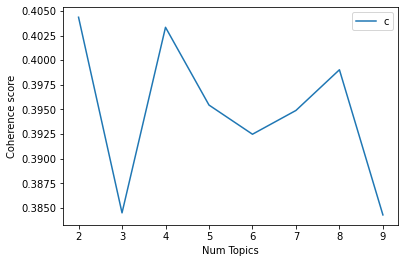

In [30]:
# Show graph
limit=10; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [31]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4044
Num Topics = 3  has Coherence Value of 0.3845
Num Topics = 4  has Coherence Value of 0.4033
Num Topics = 5  has Coherence Value of 0.3955
Num Topics = 6  has Coherence Value of 0.3925
Num Topics = 7  has Coherence Value of 0.3949
Num Topics = 8  has Coherence Value of 0.399
Num Topics = 9  has Coherence Value of 0.3843


In [32]:
# Select the model and print the topics
optimal_model = model_list[0]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(0,
  '0.021*"fuel" + 0.019*"fossil" + 0.016*"energy" + 0.016*"emission" + 0.012*"pollution" + 0.012*"air" + 0.011*"health" + 0.010*"carbon" + 0.009*"climate" + 0.009*"oil"'),
 (1,
  '0.026*"fuel" + 0.025*"fossil" + 0.020*"gas" + 0.016*"climate" + 0.016*"energy" + 0.011*"emission" + 0.011*"oil" + 0.011*"pollution" + 0.010*"air" + 0.010*"coal"')]

In [33]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(optimal_model, doc_term_matrix, dictionary)
vis

C:\Users\naikv\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.009589  0.0       1        1  70.447613
0     -0.009589  0.0       2        1  29.552387, topic_info=            Term        Freq       Total Category  logprob  loglift
34      emission  316.000000  316.000000  Default  30.0000  30.0000
50        health  187.000000  187.000000  Default  29.0000  29.0000
35        energy  401.000000  401.000000  Default  28.0000  28.0000
44          fuel  618.000000  618.000000  Default  27.0000  27.0000
4            air  265.000000  265.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
46           gas   52.252019  400.764281   Topic2  -4.9480  -0.8183
47        global   34.308776  190.162524   Topic2  -5.3687  -0.4935
62       natural   33.321069  186.605442   Topic2  -5.3979  -0.5038
114         year   32.221361  169.306999   Topic2  -5.4315  -0.4401
103  temperature   29.127340  124.274038   Topic2  -5.5324  -0.2318

[186 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2557      1  0.803157  addiction
2557      2  0.267719  addiction
802       1  0.550500    aerosol
802       2  0.450409    aerosol
4         1  0.681410        air
...     ...       ...        ...
786       2  0.153851  treatment
282       1  0.719852      water
282       2  0.283019      water
114       1  0.809181       year
114       2  0.189006       year

[254 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

In [55]:
LDA2 = LatentDirichletAllocation(n_components=2,random_state=42)

In [56]:
# This can take awhile, we're dealing with a large amount of documents!
LDA2.fit(dtm)

LatentDirichletAllocation(n_components=2, random_state=42)

In [57]:
for i in range(10):
    random_word_id = random.randint(0,2576)
    print(cv.get_feature_names()[random_word_id])

specific
fossilized
century
cycle
substantially
additionally
pacific
deadly
lives
poorest


In [59]:
len(LDA2.components_)

2

In [60]:
LDA2.components_

array([[ 4.05152429,  3.3401649 ,  5.70851325, ...,  1.04821801,
         0.73988058,  0.50013728],
       [ 0.94847571,  3.6598351 ,  1.29148675, ...,  9.95178199,
        11.26011942,  3.49986272]])

In [61]:
len(LDA2.components_[0])

2676

In [62]:
LDA2.components_.shape

(2, 2676)

In [63]:
single_topic = LDA2.components_[0]

In [64]:
# Returns the indices that would sort this array.
single_topic.argsort()

array([1311,  170,  699, ..., 1057, 1070, 1031], dtype=int64)

In [68]:
# Word least representative of this topic
single_topic[1311]

0.5000247661630097

In [69]:
# Word most representative of this topic
single_topic[1031]

322.9251064007408

In [70]:
# Top 10 words for this topic:
single_topic.argsort()[-10:]

array([ 707, 2618, 1592,  315,  824,  400, 1666, 1057, 1070, 1031],
      dtype=int64)

In [71]:
top_word_indices = single_topic.argsort()[-10:]

In [72]:
for index in top_word_indices:
    print(cv.get_feature_names()[index])

dioxide
water
natural
carbon
energy
coal
oil
fuels
gas
fossil


In [73]:
for index,topic in enumerate(LDA2.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['power', 'greenhouse', 'air', 'burning', 'fuel', 'dioxide', 'water', 'natural', 'carbon', 'energy', 'coal', 'oil', 'fuels', 'gas', 'fossil']


THE TOP 15 WORDS FOR TOPIC #1
['effects', 'children', 'carbon', 'warming', 'fuels', 'fuel', 'global', 'change', 'air', 'health', 'energy', 'pollution', 'emissions', 'fossil', 'climate']




# Attaching Discovered Topic Labels to Original Articles

In [74]:
dtm

<50x2676 sparse matrix of type '<class 'numpy.int64'>'
	with 14201 stored elements in Compressed Sparse Row format>

In [75]:
dtm.shape

(50, 2676)

In [77]:
topic_results = LDA2.transform(dtm)

In [78]:
topic_results.shape

(50, 2)

In [79]:
topic_results[0]

array([0.55086697, 0.44913303])

In [80]:
topic_results[0].round(2)

array([0.55, 0.45])

In [81]:
topic_results[0].argmax()

0

In [ ]:
#This means that our model thinks the article belongs to topic 1 (coded "0")

In [82]:
npr.head()

,Article
0,fossil fuels climate change facts link fossil ...
1,use fossil fuelscoal oil natural gasresults si...
2,century burning fossil fuels generated energy ...
3,crude oil natural gas coal organic materials h...
4,fossil fuels substances act energy sources kno...


In [83]:
topic_results.argmax(axis=1)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1], dtype=int64)

In [84]:
npr['Topic'] = topic_results.argmax(axis=1)

In [85]:
npr.head(10)

,Article,Topic
0,fossil fuels climate change facts link fossil ...,0
1,use fossil fuelscoal oil natural gasresults si...,0
2,century burning fossil fuels generated energy ...,0
3,crude oil natural gas coal organic materials h...,0
4,fossil fuels substances act energy sources kno...,0
5,fossil fuel corporations profiting continued c...,1
6,burning fossil fuels refers burning oil natura...,0
7,cars trucks release nitrogen atmosphere contri...,0
8,oil energy source time refine crude extracted ...,0
9,producing burning fossil fuels creates air pol...,1


# WordCloud

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk

def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

In [35]:
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naikv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


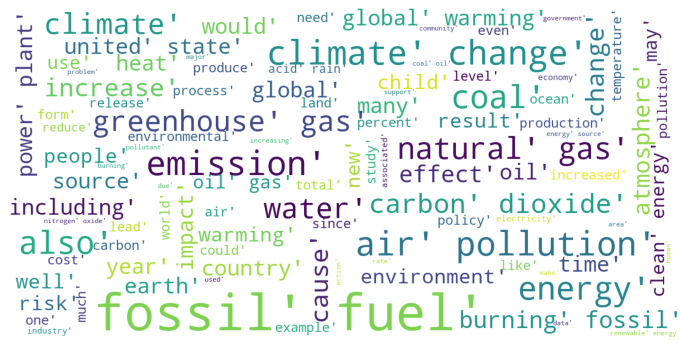

In [36]:
warnings.filterwarnings('ignore')
plot_wordcloud(npr['Article'])